# Learning From Data - Final Exam (OOP version)
## Ognen Nastov

![](final_images/finalp1.png)

**Answer:**

- For $Q=1$, $z = (1, x_1, x_2)$

- For $Q=2$, $z = (1, x_1, x_2, x_1 x_2, x_1^2, x_2^2)$

Etc.

Not counting the $x_0=1$, when $Q$ increases by $1$, we have additional terms $x_1^i x_2^j$ with $i+j=Q$. The number of such terms is equal to the number of solutions to the equation.

Analogous problem: how many ways can $Q$ pieces of candy be divided among $d$ children. Or how many $Q$ indistinguishable stars can be put into $d$ distinguishable bins.

Represent the $Q$ candies as `*`, and represent the dividers specifying the bins as `|`. There are $d$ bins, thus there are $d-1$ dividers.

E.g. for $Q=2$ and $d=2$, the set of configurations is: \{`**|` , `*|*` , `|**`\} which has 3 elements.

The number of total objects (stars and dividers) is $Q+d-1$. Choosing the positions of the dividers leaves exactly $Q$ positions left for the stars. Thus, the number of different configurations is given by the $Q$ combinations of $Q+d-1$ configurations, i.e.

$$\text{# of ways} = \binom{Q+d-1}{d-1} = \frac{(Q+d-1)!}{Q! (d-1)!}$$

If $d=2$, # ways = $\binom{Q+d-1}{d-1} = Q+1$

The total number of terms for $Q=10$ is therefore the sum $2+3+...+11$, i.e.

$$\text{dimensionality of Z} = \sum_{i=2}^{11} i  = \sum_{i=1}^{11} i - 1 = \frac{11*12}{2} - 1 = 65$$

The answer is none of the above, i.e. [e].

---

Problem 1 alternate answer:

Dimensionality of poly transform of order $Q$ is given by $\tilde{d} = \frac{Q(Q+3)}{2} = \frac{10*13}{2} = 65$

(See book pp. 104 for reference.)

---

![](final_images/finalp2.png)

**Answer:**

[a] A singleton $H$ with one hypothesis $h$, has $\bar{g} = h$, thus $\bar{g} \in H$.

[b] For $H$ being the set of all constant real valued hypotheses, the average of any number of $h \in H$ will result also in a constant real valued hypothesis from the set, thus $\bar{g} \in H$.

[c] For $H$ being the linear regression model, $h(x) = w^T x$. The average of these linear functions is also a linear function:

$$\bar{g}(x) = \frac{1}{2}(h_1(x) + h_2(x)) = \frac{1}{2}(w_1^T x + w_2^T x) = \frac{1}{2}(w_1^T + w_2^T)x$$

[d] For $H$ being the logistic regression model, $h(x) = \theta(w^T x)$ with $\theta(s) = \frac{e^s}{1+e^s}$:

$$h(x) = \frac{e^{w^T x}}{1+e^{w^T x}}$$

For the average $\bar{g}(x) = \frac{1}{2}(h_1(x) + h_2(x))$ to be representable as a logistic regression model, we need:

$$\bar{g}(x) = \frac{1}{2}(h_1(x) + h_2(x)) = \frac{1}{2} \left( \frac{e^{w_1^T x}}{1+e^{w_1^T x}} + \frac{e^{w_2^T x}}{1+e^{w_2^T x}} \right)$$

to be equal to:

$$\frac{e^{w^T x}}{1+e^{w^T x}}$$

which will not always be the case, and $\bar{g} \notin H$.

Thus, answer is [d].

---

![](final_images/finalp3.png)

**Answer:**

[a] True.

[b] True.

[c] True.

[d] False.

[e] True.

The answer is [d].

---

![](final_images/finalp4.png)

**Answer:**

[a] False.

[b] False.

[c] False.

[d] True.

[e] False.

The answer is [d].

---

![](final_images/finalp5.png)

**Answer:**

$w_{lin}$ is the solution to the unconstrained minimization problem:

$$\min \frac{1}{N} \sum_{n=1}^N (w^T x_n - y_n)^2$$

$w_{reg}$ is the solution to the constrained minimization problem:

$$\min \frac{1}{N} \sum_{n=1}^N (w^T x_n - y_n)^2$$ 

subject to $w^T \Gamma^T \Gamma w \leq C$

If $w_{lin}^T \Gamma^T \Gamma w_{lin} \leq C$, meaning $w_{lin}$ satisfies the constraint in the constrained problem, then $w_{lin}$ is the solution to the constrained problem.

It follows that $w_{lin} = w_{reg}$.

Answer is [a].

---

![](final_images/finalp6.png)

[a] written as hard-order constraints.

- Not true as the soft order constraint does not limit the orders.

[b] translated into augmented error. 

- This is true as the constrained problem is equivalent to the augmented error unconstrained problem. The soft-order constraint in the constrained problem becomes a penalty term in the augmented error unconstrained problem.

[c] determined from the value of the VC dimension.

- Not true. 

[d] used to decrease both $E_{in}$ and $E_{out}$.

- Not true. It is used to decrease both $E_{out}$ (avoid overfitting) and the augmented error $E_{aug}$. The $E_{in}$ may increase.
 
[e] None of the above is true.

- Not true.

Answer is [b].


---

![](final_images/finalp7a.png)
![](final_images/finalp7b.png)

**Answer:**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()d
import time
from sklearn import svm
import pandas as pd
from cvxopt import matrix, solvers

In [2]:
# problems 7-10
# linear regression for classification with regularization

# load training and test sets into pandas dataframes
def load_data():
    column_names = ["digit", "intensity", "symmetry"]
    sep = '\s+'
    data_train = pd.read_csv(
            "http://www.amlbook.com/data/zip/features.train", \
            sep=sep, names=column_names)
    data_test = pd.read_csv(
            "http://www.amlbook.com/data/zip/features.test", \
            sep=sep, names=column_names)
    return data_train, data_test

data_train, data_test = load_data()

In [3]:
# output labels for classifiers
classifiers_one_vs_all = dict({
        "0_vs_all": 0,
        "1_vs_all": 1,
        "2_vs_all": 2,
        "3_vs_all": 3,
        "4_vs_all": 4,
        "5_vs_all": 5,
        "6_vs_all": 6,
        "7_vs_all": 7,
        "8_vs_all": 8,
        "9_vs_all": 9
        })

classifier_1_vs_5 = {"1_vs_5": [1,5]}

In [4]:
# make one-vs-all dataframe
def make_one_vs_all_df(df, classifiers):
    # add binary labels to dataframe
    one_vs_all = pd.DataFrame(df, copy=True)
    for class_label, digit in classifiers.items():
        # get the series for a digit
        labels = one_vs_all.loc[one_vs_all["digit"] == digit, "digit"]
        # change the digit number into 1.0
        labels.loc[:] = 1.0
        # add a classifier column to the dataframe
        one_vs_all[class_label] = labels
    # fill in the NaN locations (corresponding to rest of digits) with -1.0    
    one_vs_all.fillna(-1.0, inplace=True)
    return one_vs_all

data_train_one_vs_all = make_one_vs_all_df(data_train, classifiers_one_vs_all)
data_test_one_vs_all = make_one_vs_all_df(data_test, classifiers_one_vs_all)

In [5]:
# make one-vs-one dataframe
# note: this doesn't work for more than one item in the classifiers dictionary
def make_one_vs_one_df(df, classifiers):
    # add binary labels to dataframe  
    for class_label in classifiers.keys():
        # get the two digits
        digits = classifiers[class_label]
        # filter just the rows for the two digits
        df_trimmed = df.loc[df["digit"].isin(digits),:]
        one_vs_one = pd.DataFrame(df_trimmed, copy=True)
        for digit in digits:
            # get the series for just the fist digit
            labels = one_vs_one.loc[one_vs_one["digit"] == digit, "digit"]
            # change the digit number into 1.0
            labels.loc[:] = 1.0
            # add a classifier column to the dataframe
            one_vs_one[class_label] = labels
            # ignore the second digit
            break
    # fill in the NaN locations (corresponding to second digit) with -1.0    
    one_vs_one.fillna(-1.0, inplace=True)
    return one_vs_one

data_train_1_vs_5 = make_one_vs_one_df(data_train, classifier_1_vs_5)
data_test_1_vs_5 = make_one_vs_one_df(data_test, classifier_1_vs_5)

In [6]:
# make the data set for a specific classifier
def make_data_set(df, class_label):
    inputs = np.array(df.loc[:, ["intensity", "symmetry"]])
    outputs = np.array(df.loc[:, class_label])
    data = np.column_stack((inputs, outputs))
    return data

In [7]:
# regularized least-squares linear regression for classiﬁcation
class LinearRegression:
    
    def __init__(self, transform=False):
        self.transform = transform
        return
    
    def fit(self, inputs, outputs, _lambda=1.0):    
        # get inputs and outputs
        Z = self.transform_inputs(inputs)
        y = outputs
        # linear regression solution with regularization
        d = np.size(Z, axis=1)
        Z_pinv = np.linalg.inv(Z.T@Z + _lambda*np.eye(d))@Z.T
        weights = np.dot(Z_pinv, y)
        return weights
    
    def binary_error(self, weights, inputs, outputs):    
        Z = self.transform_inputs(inputs)
        y = outputs
        g = [np.sign(np.dot(weights.T, z)) for z in Z]
        return np.count_nonzero(g != y) / len(y)        
         
    # private
    def transform_inputs(self, inputs):
        ones = np.ones(len(inputs)).reshape(len(inputs), 1)
        x1 = inputs[:, 0].reshape(len(inputs), 1)
        x2 = inputs[:, 1].reshape(len(inputs), 1)
        if self.transform:
            return np.concatenate((ones, x1, x2, x1*x2, x1**2, x2**2), axis=1)
        else:
            return np.concatenate((ones, x1, x2), axis=1)

In [8]:
# compute E_in and E_out
def in_out_sample_errors(classifiers, data_train, data_test=pd.DataFrame(), 
                         _lambda=1.0, transform=False):
    results = [] 
    for class_label in classifiers.keys():
            # get training data
            data_set_train = make_data_set(data_train, class_label)
            inputs_train = data_set_train[:, 0:2]
            outputs_train = data_set_train[:, 2]          
            # fit the model
            lr = LinearRegression(transform)
            weights = lr.fit(inputs_train, outputs_train, _lambda)         
            # compute in-sample error
            E_in = lr.binary_error(weights, inputs_train, outputs_train)       
            # get testing data
            E_out = None
            if not data_test.empty:
                data_set_test = make_data_set(data_test, class_label)
                inputs_test = data_set_test[:, 0:2]
                outputs_test = data_set_test[:, 2]       
                # compute out-of-sample error
                E_out =  lr.binary_error(weights, inputs_test, outputs_test) 
            # add to results
            result = {"classifier": class_label,
                      "transform": transform,
                      "lambda": _lambda,
                      "E_in": E_in,
                      "E_out": E_out}
            results.append(result)
    return results

In [9]:
results = in_out_sample_errors(classifiers_one_vs_all, data_train_one_vs_all, data_test_one_vs_all, 
                               _lambda=1.0, transform=False)

In [10]:
pd.DataFrame(results)

,classifier,transform,lambda,E_in,E_out
0,0_vs_all,False,1.0,0.109313,0.115097
1,1_vs_all,False,1.0,0.015224,0.022422
2,2_vs_all,False,1.0,0.100261,0.098655
3,3_vs_all,False,1.0,0.090248,0.082711
4,4_vs_all,False,1.0,0.089425,0.099651
5,5_vs_all,False,1.0,0.076258,0.079721
6,6_vs_all,False,1.0,0.091071,0.084704
7,7_vs_all,False,1.0,0.088465,0.073244
8,8_vs_all,False,1.0,0.074338,0.082711
9,9_vs_all,False,1.0,0.088328,0.088191


Out of the `5_vs_all` through `9_vs_all` classifiers, the lowest `E_in` is found for `8_vs_all`.

Answer is [d].

---

![](final_images/finalp8.png)

**Answer:**

In [11]:
results2 = in_out_sample_errors(classifiers_one_vs_all, data_train_one_vs_all, data_test_one_vs_all,
                                _lambda=1.0, transform=True)

In [12]:
pd.DataFrame(results2)

,classifier,transform,lambda,E_in,E_out
0,0_vs_all,True,1.0,0.102318,0.106627
1,1_vs_all,True,1.0,0.012344,0.021923
2,2_vs_all,True,1.0,0.100261,0.098655
3,3_vs_all,True,1.0,0.090248,0.082711
4,4_vs_all,True,1.0,0.089425,0.099651
5,5_vs_all,True,1.0,0.076258,0.079223
6,6_vs_all,True,1.0,0.091071,0.084704
7,7_vs_all,True,1.0,0.088465,0.073244
8,8_vs_all,True,1.0,0.074338,0.082711
9,9_vs_all,True,1.0,0.088328,0.088191


Out of the `0_vs_all` through `4_vs_all` classifiers, the lowest `E_out` is found for `1_vs_all`.

Answer is [b].

---

![](final_images/finalp9a.png)
![](final_images/finalp9b.png)

**Answer:**

[a] Overfitting always occurs when we use the transform. 

- Not true.

[b] The transform always improves the out-of-sample performance by at least 5% ($E_{out}$ with transform $ \leq 0.95E_{out}$ without transform).

- Let's check:

In [13]:
100*(pd.DataFrame(results)['E_out'] - pd.DataFrame(results2)['E_out'])/pd.DataFrame(results)['E_out']

0    7.359307
1    2.222222
2    0.000000
3    0.000000
4    0.000000
5    0.625000
6    0.000000
7    0.000000
8    0.000000
9    0.000000
Name: E_out, dtype: float64

- Not true: there is improvement in `E_out` only for `0_vs_all`, `1_vs_all`, and `5_vs_all`.

[c] The transform does not make any difference in the out-of-sample performance. 

- Not true: There is improvement in `E_out` for `0_vs_all`, `1_vs_all`, and `5_vs_all`. 

[d] The transform always worsens the out-of-sample performance by at least 5%. 

- Not true.

[e] The transform improves the out-of-sample performance of ‘5 versus all,’ but by less than 5%. 

- True, as the `5_vs_all` `E_out` performance is improved by 0.625%.

Answer is [e].

---

![](final_images/finalp10.png)

**Answer:**

For $\lambda = 1$:

In [14]:
result3 = in_out_sample_errors(classifier_1_vs_5, data_train_1_vs_5, data_test_1_vs_5, _lambda=1.0, transform=True)
print(pd.DataFrame(result3))

  classifier  transform  lambda      E_in     E_out
0     1_vs_5       True     1.0  0.005125  0.025943


For $\lambda = 0.01$:

In [15]:
result4 = in_out_sample_errors(classifier_1_vs_5, data_train_1_vs_5, data_test_1_vs_5, _lambda=0.01, transform=True)
print(pd.DataFrame(result4))

  classifier  transform  lambda      E_in     E_out
0     1_vs_5       True    0.01  0.004484  0.028302


[a] Overfitting occurs (from $\lambda=1$ to $\lambda=0.01$). 

- This is true as `E_out` increases.

[b] The two classifiers have the same $E_{in}$.

- Not true.

[c] The two classifiers have the same $E_{out}$.

- Not true.

[d] When $\lambda$ goes up, both $E_{in}$ and $E_{out}$ go up.

- Not true. When `lambda` ⬆️, `E_in` ⬆️, and `E_out` ⬇️.

[e] When $\lambda$ goes up, both $E_{in}$ and $E_{out}$ go down.

- Not true. When `lambda` ⬆️, `E_in` ⬆️, and `E_out` ⬇️.

Answer is [a].

---

![](final_images/finalp11.png)

**Answer:**

In [16]:
# Support Vector Machines
    
# data set for problems 11-12
def get_training_set():
    return np.array([1., 0., -1.,
                     0., 1., -1.,
                     0., -1., -1.,
                     -1., 0., 1.,
                     0., 2., 1.,
                     0., -2., 1.,
                     -2., 0., 1.]).reshape(7, 3)
    
train_data = get_training_set()
train_inputs = train_data[:, 0:2]
train_outputs = train_data[:, 2]

In [17]:
def transform_inputs(inputs):
    x1 = inputs[:, 0].reshape(len(inputs), 1)
    x2 = inputs[:, 1].reshape(len(inputs), 1)
    return np.concatenate((x2**2 - 2*x1 - 1, x1**2 - 2*x2 + 1), axis=1)
    
train_inputs_transformed = transform_inputs(train_inputs)

In [18]:
# problem 11
# labels to the plots use tex rendering
def plot_data(features, label, features_names=['$x_{1}$', '$x_{2}$'],
              plot_hyperplanes=False):
    plt.scatter(features[:, 0], features[:, 1], c=label, cmap='rainbow');
    plt.xlabel(features_names[0]);
    plt.ylabel(features_names[1]);
    if plot_hyperplanes:
        eps = 1e-12 # to prevent divide by zero
        xfit = np.linspace(-3.5, 3.5)
        for w1, w2, b in [(-1., 1., -0.5), (1., -1., -0.5), (1., 0., -0.5), 
                          (0., 1., -0.5)]:
            slope = -w1 / (w2+eps)
            intercept = -b / (w2+eps)
            yfit =  slope * xfit + intercept
            plt.plot(xfit, yfit, label=f"w1 = {w1}, w2 = {w2}, b = {b}")
            plt.legend(loc='upper left')
        plt.xlim(-3.5, 3.5);
        plt.ylim(-3.5, 5.5);

The hyperplane separates the data only if for $n = 1,\cdots,7$:

$$y_n(w^T z + b) > 0$$ .

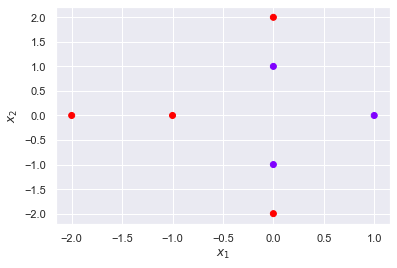

In [19]:
plot_data(train_inputs, train_outputs)

It can be seen the original training data in $X$ space is not linearly separable.

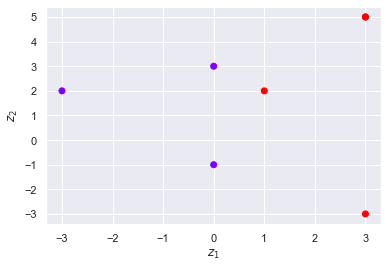

In [20]:
plot_data(train_inputs_transformed, train_outputs, features_names=['$z_{1}$', '$z_{2}$'])

The transformed training data in $Z$ space is now linearly separable.

Plot the 4 hyperplanes for [a] through [d]:

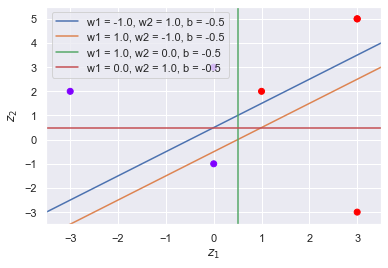

In [21]:
plot_data(train_inputs_transformed, train_outputs, features_names=['$z_{1}$', '$z_{2}$'], plot_hyperplanes=True)

From the plot the only hyperplane that separates the data is [c].

- It is orthogonal to the weight vector $w = [1.0, 0.0]$. 

- It separates the data with the maximum margin (as it bisects the closest points of the two classes), and that margin is 1.

=> Answer is [c].

---

![](final_images/finalp12.png)

**Answer:**

Implement hard margin SVM with the polynomial kernel using the `sklearn (libsvm)` package:

In [22]:
# problem 12
# hard margin SVM (set C = 1e10) with poly kernel, use sklearn package
# no transform        
def svm_hard_poly(Q):
    clf = svm.SVC(C=1e10, kernel='poly', degree=Q, gamma=1.0, coef0=1.0)
    return clf

def problem_12():
    clf = svm_hard_poly(2)
    clf.fit(train_inputs, train_outputs)
    num_support_vectors = np.size(clf.support_)
    support_vectors = clf.support_vectors_
    # dual_coef_ is the vector of products y_i*alpha_i
    # alphas are positive, thus:
    sv_outputs = np.sign(clf.dual_coef_)
    print(f'b = {clf.intercept_}')
    print(f"alphas = \n{sv_outputs*clf.dual_coef_}")
    print(f"support vectors = \n{support_vectors}")
    print(f"# support vectors = {num_support_vectors}")
    return num_support_vectors

In [23]:
problem_12()

b = [-1.66633088]
alphas = 
[[0.59647182 0.81065085 0.8887034  0.20566488 0.31275439]]
support vectors = 
[[ 0.  1.]
 [ 0. -1.]
 [-1.  0.]
 [ 0.  2.]
 [ 0. -2.]]
# support vectors = 5


5

Answer is [c].

---

Alternate solution to problem 12: implement hard margin SVM with polynomial or RBF kernel, using the `cvxopt` package.

Also used in problems 13, 14, and 15.

In [24]:
# problems 13, 14, 15 (RBF kernel)
# also used for an alternate solution to problem 12 (poly kernel)
# uses cvxopt to solve the qp problem
class SVM:

    def __init__(self, kernel='poly', Q=2, gamma=1.0, tol_sv=1e-5):
        if kernel not in ['poly','rbf']:
            raise ValueError('Kernel must be "poly" or "rbf".')  
        self.kernel = kernel
        self.Q = Q
        self.gamma = gamma
        self.tol_sv = tol_sv # tightening increases # of support vectors
        
    def fit(self, inputs, outputs):
        xn = inputs
        yn = outputs
        N = len(xn)

        # construct quadratic coefficients matrix
        mat = []
        for row_idx in range(0, N):
            for col_idx in range(0, N):
                if self.kernel == 'poly':
                    kernel = self.kernel_poly(xn[row_idx], xn[col_idx])
                elif self.kernel == 'rbf':
                    kernel = self.kernel_rbf(xn[row_idx], xn[col_idx])
                val = yn[row_idx] * yn[col_idx] * kernel
                mat.append(val)
        mat = np.array(mat).reshape((N, N))
        
        # form matrices for quadratic programming solver
        P = matrix(mat, tc='d')
        q = matrix(-np.ones(N), tc='d')
        b = matrix(0.0, tc='d')
        A = matrix(yn, tc='d')
        A = A.trans()
        G = matrix(-np.identity(N), tc='d')
        h = matrix(np.zeros(N), tc='d')
                
        # call qp solver to compute weights
        solvers.options['show_progress'] = False # supress solver output  
        sol = solvers.qp(P, q, G, h, A, b)
        alpha = np.array(list(sol['x']))
        
        sv = []
        sv_alphas = []
        sv_outputs = []
        for n in range(0, N):
            if alpha[n] > self.tol_sv: # => xn[n] is support vector
                sv.append(xn[n])
                sv_alphas.append(alpha[n])
                sv_outputs.append(yn[n])
                    
        # compute number of support vectors 
        num_sv = len(sv)
        if (num_sv == 0):
            raise Exception('There are no support vectors.')
        
        # compute b by averaging b's obtained from support vectors
        bs = []
        for m in range(0, num_sv):
            b = sv_outputs[m]
            for n in range(0, num_sv):
                if self.kernel == 'poly':
                    kernel = self.kernel_poly(sv[n], sv[m])
                elif self.kernel == 'rbf':
                    kernel = self.kernel_rbf(sv[n], sv[m])
                b -= sv_alphas[n] * sv_outputs[n] * kernel
            bs.append(b)
        bs_avg = np.mean(bs)

        return np.array(sv_alphas), np.array(sv), np.array(sv_outputs), bs_avg
    
    def binary_error(self, sv_alphas, sv, sv_outputs, b, inputs, outputs):
        x = inputs
        y = outputs
        num_sv = len(sv)
        
        gs = []
        for xm in x:
            signal = 0.0
            for n in range(0, num_sv):
                if self.kernel == 'poly':
                    kernel = self.kernel_poly(sv[n], xm)
                elif self.kernel == 'rbf':
                    kernel = self.kernel_rbf(sv[n], xm)
                signal += sv_alphas[n] * sv_outputs[n] * kernel
            signal += b
            gs.append(signal)
                
        g = np.array(np.sign(gs))
        return 100. * np.count_nonzero(y != g) / len(y)   
    
    # private
    def kernel_poly(self, xn, xm):
        return (1.0 + np.dot(xn.T, xm))**self.Q
    
    # private
    def kernel_rbf(self, xn, xm):
        return np.exp(-self.gamma * (np.linalg.norm(xn - xm)**2))

In [25]:
# problem 12 alternate solution    
def problem_12_alt(tol_sv=1e-5):
    svm = SVM(kernel='poly', tol_sv=tol_sv)
    alphas, support_vectors, outputs, b = \
        svm.fit(train_inputs, train_outputs)
    num_support_vectors = len(support_vectors)
    print(f'b = {b}')
    print(f"alphas = \n{alphas}")
    print(f"support vectors = \n{support_vectors}")
    print(f"# support vectors = {num_support_vectors}")
    return num_support_vectors

In [26]:
problem_12_alt(tol_sv=1e-5)

b = -1.6666666856035512
alphas = 
[0.7037037  0.7037037  0.88888889 0.25925926 0.25925926]
support vectors = 
[[ 0.  1.]
 [ 0. -1.]
 [-1.  0.]
 [ 0.  2.]
 [ 0. -2.]]
# support vectors = 5


5

Answer is [c].

Note that tightening `tol_sv` from `1e-5` to `1e-12` increases the # of support vectors and gives the wrong answer:

In [27]:
problem_12_alt(tol_sv=1e-12)

b = -2.0793650937934736
alphas = 
[4.32455509e-09 7.03703704e-01 7.03703704e-01 8.88888891e-01
 2.59259260e-01 2.59259260e-01 5.27081499e-10]
support vectors = 
[[ 1.  0.]
 [ 0.  1.]
 [ 0. -1.]
 [-1.  0.]
 [ 0.  2.]
 [ 0. -2.]
 [-2.  0.]]
# support vectors = 7


7

---

![](final_images/finalp13a.png)
![](final_images/finalp13b.png)

**Answer:**

In [28]:
# problems 13-18 common code
def generate_training_inputs(N=100):
    return np.array([np.random.uniform(-1.0, 1.0, 2) for n in range(0, N)])        

def compute_targets(inputs):
    x1 = inputs[:, 0]
    x2 = inputs[:, 1]
    return np.sign(x1 - x2 + 0.25 * np.sin(np.pi * x1))

In [29]:
# problem 13
# SVM hard margin with RBF kernel trials
def run_svm_trials(N=100, n_trials=100, gamma=1.5, use_sklearn=False):
    ein = 0.
    non_sep_count = 0
    
    for n_trial in range(0, n_trials):
        train_inputs = generate_training_inputs(N)
        train_outputs = compute_targets(train_inputs)
        
        if use_sklearn == False: # use cvxopt
            svm_cvxopt = SVM(kernel='rbf', gamma=gamma)
            alphas, sv, sv_outputs, b = svm_cvxopt.fit(train_inputs, \
                                                       train_outputs)
            ein = svm_cvxopt.binary_error(alphas, sv, sv_outputs, b, \
                                          train_inputs, train_outputs)
            
        elif use_sklearn == True: # use sklearn (libsvm)
            clf = svm.SVC(C=1e10, kernel='rbf', gamma=1.0, coef0=1.0)
            clf.fit(train_inputs, train_outputs)
            model_outputs = clf.predict(train_inputs)
            ein = np.count_nonzero(train_outputs != model_outputs) / N
     
        if ein > 0.0:
            non_sep_count += 1
    
        perc_complete = 100*n_trial/n_trials
        # this line does not work without the \r in the beginning
        print(f'\rJob {perc_complete:3.1f}% complete.', end='\r', flush=True)
        
    return non_sep_count / n_trials

In [30]:
def problem_13(use_sklearn=False):
    time_start = time.time()
    n_trials=100
    non_sep_percent = run_svm_trials(100, n_trials, use_sklearn=use_sklearn)
    print(f"The data set is not separable by the RBF kernel \
{round(non_sep_percent, 2)}% of the time in {n_trials} runs.")
    time_end = time.time()
    print(f"Run time = {(time_end - time_start):3.1f} seconds.")
    return

Using `cvxopt`:

In [31]:
problem_13(use_sklearn=False)

The data set is not separable by the RBF kernel 0.0% of the time in 100 runs.
Run time = 28.6 seconds.


Using `sklearn (libsvm)`:

In [32]:
problem_13(use_sklearn=True)

The data set is not separable by the RBF kernel 0.0% of the time in 100 runs.
Run time = 0.5 seconds.


Note: `sklearn` is **much faster** than `cvxopt`!

Answer is [a].

---

![](final_images/finalp14.png)

**Answer:**

Implement the Lloyd's algorithm:

In [33]:
# problem 14
# Lloyd's algorithm: cluster inputs into K clusters
class KMeans:
    
    @staticmethod
    def fit(inputs, K=3, n_runs = 1, max_iter=300, tol=0.0001, verbose=False):
        # returns the tuple (Centroids of clusters (μ1, ..., μk) , 
        #                    cluster labels of inputs)
        run_cluster_labels = []
        run_centroids = []
        
        for run in range(0, n_runs):
            
            # initialize K centroids at random 
            # (note we could also initialize clusters instead)
            centroids = generate_training_inputs(K)
            prev_cluster_labels = []
            
            for iteration in range(0, max_iter):
                if verbose:
                    print('\nIteration = ', iteration+1)
                
                # assign inputs to cluster with closest centroid
                cluster_labels = []
                for inputt in inputs:
                    distances = []
                    for centroid in centroids:
                        distance = np.linalg.norm(inputt - centroid)
                        distances.append(distance)
                    cluster_num = np.argmin(distances)
                    cluster_labels.append(cluster_num)
                    if verbose:
                        print(f"{inputt} assigned to cluster {cluster_num}")
                if verbose:
                    print('cluster labels = ', cluster_labels)

                # if a cluster is empty discard the run
                if set(cluster_labels) != set(range(0, K)):
                    if verbose:
                        print('\nEmpty cluster. Discard this run.')
                    return (np.array([]), np.array([]))

                prev_centroids = centroids

                # compute cluster centroids
                centroids = []
                for cluster_label in range(0, K):
                    input_idxs = [i for i, label in enumerate(cluster_labels)
                        if label == cluster_label]
                    mean_cluster = np.mean(inputs[input_idxs], axis=0)
                    if verbose:
                        print(f'indices = {input_idxs}, \
mean cluster = {mean_cluster}')
                    centroids.append(mean_cluster)              
                centroids = np.array(centroids)
                
                # check for convergence
                if verbose:
                    print('prev_centroids = \n', prev_centroids)
                    print('centroids = \n', centroids)
                if iteration > 0: 
                    if np.linalg.norm(prev_centroids - centroids) < tol and \
                        prev_cluster_labels == cluster_labels:
                        if verbose:
                            print('\nConverged')
                        break

                prev_cluster_labels = cluster_labels
                
            run_centroids.append(centroids)
            run_cluster_labels.append(cluster_labels)
            
        high_count_index = KMeans.arg_max_run_clusters(run_cluster_labels, \
                                                       K, n_runs)
        
        return run_centroids[high_count_index], \
            np.array(run_centroids[high_count_index])
    
    # private
    @staticmethod
    def arg_max_run_clusters(run_cluster_labels, K, n_runs):
        counts = {}
        run_clusters = []
        for run in range(0, len(run_cluster_labels)):
            run_cluster = []
            for k in range(0, K):
                indices = [i for i, x in enumerate(run_cluster_labels[run]) \
                           if x == k]
                run_cluster.append(indices)
            run_cluster.sort()

            if run_cluster not in run_clusters:
                run_clusters.append(run_cluster)
                counts[run] = 1
            else:
                run_clusters.append([])
                index = run_clusters.index(run_cluster)
                counts[index] += 1
                
        high_count_index = max(counts, key=counts.get)
        return high_count_index

Test the Lloyd's algorithm on the small (N=7) data set from problems 11-12:

In [34]:
# test KMeans on the small (N=7) data set from problems 11-12
def test_KMeans(K=3):
    train_data = get_training_set()
    train_inputs = train_data[:, 0:2]
    mu, labels = KMeans.fit(train_inputs, K=K, verbose=True)
    return

In [35]:
test_KMeans(K=3)


Iteration =  1
[1. 0.] assigned to cluster 1
[0. 1.] assigned to cluster 1
[ 0. -1.] assigned to cluster 1
[-1.  0.] assigned to cluster 2
[0. 2.] assigned to cluster 1
[ 0. -2.] assigned to cluster 0
[-2.  0.] assigned to cluster 2
cluster labels =  [1, 1, 1, 2, 1, 0, 2]
indices = [5], mean cluster = [ 0. -2.]
indices = [0, 1, 2, 4], mean cluster = [0.25 0.5 ]
indices = [3, 6], mean cluster = [-1.5  0. ]
prev_centroids = 
 [[-0.70167205 -0.35740014]
 [-0.21202989 -0.21797474]
 [-0.84683452 -0.32076596]]
centroids = 
 [[ 0.   -2.  ]
 [ 0.25  0.5 ]
 [-1.5   0.  ]]

Iteration =  2
[1. 0.] assigned to cluster 1
[0. 1.] assigned to cluster 1
[ 0. -1.] assigned to cluster 0
[-1.  0.] assigned to cluster 2
[0. 2.] assigned to cluster 1
[ 0. -2.] assigned to cluster 0
[-2.  0.] assigned to cluster 2
cluster labels =  [1, 1, 0, 2, 1, 0, 2]
indices = [2, 5], mean cluster = [ 0.  -1.5]
indices = [0, 1, 4], mean cluster = [0.33333333 1.        ]
indices = [3, 6], mean cluster = [-1.5  0. ]
prev_

Implement RBF model. It uses Lloyd's algorithm and computes the solution using the pseudo-inverse:

In [36]:
# regular RBF model classification, uses Lloyd's (KMeans) and pseudo-inverse
class RBF:
    
    def __init__(self, gamma=1.0, K=3):
        self.gamma = gamma
        self.K = K
    
    def fit(self, inputs, outputs):
       # returns the weights and the cluster centroids
        x = inputs
        y = outputs
        N = len(x)
        
        # cluster the inputs to obtain centroids mu
        mu, labels = KMeans.fit(inputs, self.K)
        if np.size(mu) == 0:
            return (np.array([]), np.array([]))
        
        # construct phi matrix
        phi = []
        for row_idx in range(0, N):
            for col_idx in range(0, self.K):
                kernel = self.kernel_rbf(x[row_idx], mu[col_idx])
                phi.append(kernel)
        phi = np.array(phi).reshape((N, self.K))
        
        # pseudo-inverse solution 
        weights = np.linalg.inv(phi.T@phi) @ (phi.T@y)
        return weights, mu
    
    def binary_error(self, weights, centroids, inputs, outputs):
        x = inputs
        y = outputs
        N = len(x)
        mu = centroids
        
        # construct phi matrix
        phi = []
        for row_idx in range(0, N):
            for col_idx in range(0, self.K):
                kernel = self.kernel_rbf(x[row_idx], mu[col_idx])
                phi.append(kernel)
        phi = np.array(phi).reshape((N, self.K))
        
        # construct predictions and error percentage
        signal = np.matmul(phi, weights)
        g = np.sign(signal)
        return 100. * np.count_nonzero(y != g) / len(y)   
        
    # private
    def kernel_rbf(self, xn, muk):
        return np.exp(-self.gamma * (np.linalg.norm(xn - muk)**2))

In [37]:
def run_regular_kernel_trials(N=100, N_test=10000, n_trials=100, 
                              K=9, gamma=1.5, use_sklearn=False):
    non_sep_count = 0
    empty_cluster_count = 0
    wins_svm = 0
    
    for n_trial in range(0, n_trials):
        # generate training data
        train_inputs = generate_training_inputs(N)
        train_outputs = compute_targets(train_inputs)
        
        # run SVM
        if use_sklearn == False: # use cvxopt
            svm_cvxopt = SVM(kernel='rbf', gamma=gamma)
            alphas, sv, sv_outputs, b = \
                svm_cvxopt.fit(train_inputs, train_outputs)
            ein = svm_cvxopt.binary_error(alphas, sv, sv_outputs, b, \
                                          train_inputs, train_outputs)
            
        elif use_sklearn == True: # use sklearn (libsvm)
            clf = svm.SVC(C=1e10, kernel='rbf', gamma=1.0, coef0=1.0)
            clf.fit(train_inputs, train_outputs)
            model_outputs = clf.predict(train_inputs)
            ein = np.count_nonzero(train_outputs != model_outputs) / N
            
        # check if non-separable
        if ein > 0.0:
            non_sep_count += 1
            continue
        
        # run regular RBF
        rbf = RBF(gamma, K)
        weights, centroids = rbf.fit(train_inputs, train_outputs)
        
        # check if empty clusters
        if np.size(weights) == 0:
            empty_cluster_count += 1
            continue
        
        # generate out of sample data
        # out of sample size should be at least 100*N for reliable estimate
        test_inputs = generate_training_inputs(N_test)
        test_outputs = compute_targets(test_inputs)
        
        # compute and compare out of sample errors
        if use_sklearn == False:
            eout_svm = svm_cvxopt.binary_error(alphas, sv, sv_outputs, b, \
                                               test_inputs, test_outputs)
        elif use_sklearn == True:
            model_test_outputs = clf.predict(test_inputs)
            eout_svm = np.count_nonzero(test_outputs != model_test_outputs) / N
            
        eout_rbf = rbf.binary_error(weights, centroids, test_inputs, \
                                    test_outputs) 
        
        if eout_svm < eout_rbf:
            wins_svm +=1
            
        perc_complete = 100*n_trial/n_trials
        # this line does not work without the \r in the beginning
        print(f'\rJob {perc_complete:3.1f}% complete.', end='\r', flush=True)
            
    win_percent = \
        100. * wins_svm / (n_trials - non_sep_count - empty_cluster_count)
    return (win_percent, non_sep_count, empty_cluster_count)

Function `problem_14()` uses `run_regular_kernel_trials()`.

In [38]:
def problem_14(N_test, use_sklearn=False):
    time_start = time.time()
    n_trials = 100
    K = 9
    gamma = 1.5
    N = 100
    win_percent, non_sep_count, empty_cluster_count = \
        run_regular_kernel_trials(N, N_test, n_trials, K, gamma, use_sklearn)
    runs = n_trials - non_sep_count - empty_cluster_count
    print(f"For K = {K} and γ = {gamma} the kernel form beats the regular \
form {round(win_percent, 2)}% of the time in {runs} runs ({non_sep_count} \
runs not separable, {empty_cluster_count} runs with empty clusters).")
    time_end = time.time()
    print(f"Run time = {(time_end - time_start):3.1f} seconds.")
    return

- Using `cvxopt`, out of sample size `N_test = 1000`:

In [39]:
problem_14(N_test=1000, use_sklearn=False)

For K = 9 and γ = 1.5 the kernel form beats the regular form 80.9% of the time in 89 runs (0 runs not separable, 11 runs with empty clusters).
Run time = 74.0 seconds.


- Using `cvxopt`, out of sample size `N_test = 10000`:

In [40]:
problem_14(N_test=10000, use_sklearn=False)

For K = 9 and γ = 1.5 the kernel form beats the regular form 80.65% of the time in 93 runs (0 runs not separable, 7 runs with empty clusters).
Run time = 391.9 seconds.


- Using `sklearn (libsvm)`, out of sample size `N_test = 1000`:

In [41]:
problem_14(N_test=1000, use_sklearn=True)

For K = 9 and γ = 1.5 the kernel form beats the regular form 100.0% of the time in 87 runs (0 runs not separable, 13 runs with empty clusters).
Run time = 33.3 seconds.


- Using `sklearn (libsvm)`, out of sample size `N_test = 10000`:

In [42]:
problem_14(N_test=10000, use_sklearn=True)

For K = 9 and γ = 1.5 the kernel form beats the regular form 90.91% of the time in 88 runs (0 runs not separable, 12 runs with empty clusters).
Run time = 183.8 seconds.


Note: `sklearn` is **much faster** than `cvxopt`!

Answer is [e].

---

Repeat the runs in **Google Colab** with `N_test = 10000` and `use_sklearn = True`.

- Using runtime hardware accelerator = `None`:

`For K = 9 and γ = 1.5 the kernel form beats the regular form 82.98% of the time in 94 runs (0 runs not separable, 6 runs with empty clusters).
Run time = 82.4 seconds.`

=> **2.6x faster**

- Using runtime hardware accelerator = `GPU`:

`For K = 9 and γ = 1.5 the kernel form beats the regular form 82.22% of the time in 90 runs (0 runs not separable, 10 runs with empty clusters).
Run time = 67.5 seconds.`

=> **3x faster**

- Using runtime hardware accelerator = `TPU`:

`For K = 9 and γ = 1.5 the kernel form beats the regular form 87.91% of the time in 91 runs (0 runs not separable, 9 runs with empty clusters).
Run time = 78.7 seconds.`

=> **2.5x faster**

---

![](final_images/finalp15.png)

**Answer:**

Function `problem_15()` uses `run_regular_kernel_trials()`.

In [43]:
# problem 15
# same as problem_14(), just with different K
def problem_15(N_test, use_sklearn=False):
    time_start = time.time()
    n_trials = 100
    K = 12
    gamma = 1.5
    N = 100
    win_percent, non_sep_count, empty_cluster_count = \
        run_regular_kernel_trials(N, N_test, n_trials, K, gamma, use_sklearn)
    runs = n_trials - non_sep_count - empty_cluster_count
    print(f"For K = {K} and γ = {gamma} the kernel form beats the regular \
form {round(win_percent, 2)}% of the time in {runs} runs ({non_sep_count} \
runs not separable, {empty_cluster_count} runs with empty clusters).")
    time_end = time.time()
    print(f"Run time = {(time_end - time_start):3.1f} seconds.")
    return

- Using `cvxopt`, out of sample size `N_test = 1000`:

In [44]:
problem_15(N_test=1000, use_sklearn=False)

For K = 12 and γ = 1.5 the kernel form beats the regular form 67.86% of the time in 84 runs (0 runs not separable, 16 runs with empty clusters).
Run time = 113.5 seconds.


- Using `cvxopt`, out of sample size `N_test = 10000`:

In [45]:
problem_15(N_test=10000, use_sklearn=False)

For K = 12 and γ = 1.5 the kernel form beats the regular form 66.22% of the time in 74 runs (0 runs not separable, 26 runs with empty clusters).
Run time = 408.3 seconds.


- Using `sklearn (libsvm)`, out of sample size `N_test = 1000`:

In [46]:
problem_15(N_test=1000, use_sklearn=True)

For K = 12 and γ = 1.5 the kernel form beats the regular form 100.0% of the time in 82 runs (0 runs not separable, 18 runs with empty clusters).
Run time = 40.6 seconds.


- Using `sklearn (libsvm)`, out of sample size `N_test = 10000`:

In [47]:
problem_15(N_test=10000, use_sklearn=True)

For K = 12 and γ = 1.5 the kernel form beats the regular form 88.73% of the time in 71 runs (0 runs not separable, 29 runs with empty clusters).
Run time = 198.1 seconds.


Answer is [d].

---

![](final_images/finalp16a.png)
![](final_images/finalp16b.png)

**Answer:**

In [48]:
# problems 16 and 17
def run_reg_rbf_param_trials(N=100, n_trials=100, Ks=[9], gammas=[1.5]):
    empty_cluster_count = 0
    ein_down_eout_up = 0
    ein_up_eout_down = 0
    both_up = 0
    both_down = 0
    both_same = 0
    
    for n_trial in range(0, n_trials):
        eins = []
        eouts = []
        for K in Ks:
            for gamma in gammas:
                
                # generate training data
                train_inputs = generate_training_inputs(N)
                train_outputs = compute_targets(train_inputs)

                # run regular RBF
                rbf = RBF(gamma, K)
                weights, centroids = rbf.fit(train_inputs, train_outputs)

                # check if empty clusters
                if np.size(weights) == 0:
                    empty_cluster_count += 1
                    continue

                # generate out of sample data
                test_inputs = generate_training_inputs(N*10)
                test_outputs = compute_targets(test_inputs)

                # compute and compare values of in and out of sample errors
                ein = rbf.binary_error(weights, centroids, \
                                       train_inputs, train_outputs) 
                eout = rbf.binary_error(weights, centroids, \
                                        test_inputs, test_outputs) 
                
                eins.append(ein)
                eouts.append(eout)
        
        # skip comparisons if empty cluster
        if len(eins) < 2 or len(eouts) < 2:
            continue
        
        # perform comparisons for Ein and Eout
        # note: there are actually 9 possibilities
        if (eins[1] > eins[0]) and (eouts[1] > eouts[0]):
            both_up += 1
        elif (eins[1] < eins[0]) and (eouts[1] < eouts[0]):
            both_down += 1
        elif (eins[1] > eins[0]) and (eouts[1] < eouts[0]):
            ein_up_eout_down += 1
        elif (eins[1] < eins[0]) and (eouts[1] > eouts[0]):
            ein_down_eout_up += 1
        else:
            both_same += 1
        
        perc_complete = 100*n_trial/n_trials
        # this line does not work without the \r in the beginning
        print(f'\rJob {perc_complete:3.1f}% complete.', end='\r', flush=True)
        
    counts = {'Ein goes down, but Eout goes up': ein_down_eout_up,
              'Ein goes up, but Eout goes down ': ein_up_eout_down,
              'Both Ein and Eout go up': both_up,
              'Both Ein and Eout go down': both_down,
              'Ein and Eout remain the same': both_same
             }
    
    return counts

Function `problem_16()` uses `run_reg_rbf_param_trials()`.

In [49]:
# measure the effect of K going from 9 to 12
def problem_16():
    time_start = time.time()
    n_trials = 100
    Ks=[9, 12]
    gammas=[1.5]
    counts = run_reg_rbf_param_trials(100, n_trials, Ks, gammas)
    print(f'counts = {counts}')
    max_counts = max(counts, key=counts.get)
    print(f"For regular RBF with γ = {gammas[0]}. If we go from K = {Ks[0]} \
clusters to K = {Ks[1]} clusters then '{max_counts}' happens the most \
({counts[max_counts]} times) (excluding runs with empty clusters).")
    time_end = time.time()
    print(f"Run time = {(time_end - time_start):3.1f} seconds.")
    return

In [50]:
problem_16()

counts = {'Ein goes down, but Eout goes up': 6, 'Ein goes up, but Eout goes down ': 16, 'Both Ein and Eout go up': 8, 'Both Ein and Eout go down': 21, 'Ein and Eout remain the same': 19}
For regular RBF with γ = 1.5. If we go from K = 9 clusters to K = 12 clusters then 'Both Ein and Eout go down' happens the most (21 times) (excluding runs with empty clusters).
Run time = 73.2 seconds.


Answer is [d].

---

![](final_images/finalp17.png)

**Answer:**

Function `problem_17()` uses `run_reg_rbf_param_trials()`.

In [64]:
# measure the effect of gamma going from 1.5 to 2
def problem_17():
    time_start = time.time()
    n_trials = 500
    Ks=[9]
    gammas=[1.5, 2.0]
    counts = run_reg_rbf_param_trials(100, n_trials, Ks, gammas)
    print(f'counts = {counts}')
    max_counts = max(counts, key=counts.get)
    print(f"For regular RBF with K = {Ks[0]} clusters. If we go from γ = \
{gammas[0]} to γ = {gammas[1]} then '{max_counts}' happens the most \
({counts[max_counts]} times) (excluding runs with empty clusters).")
    time_end = time.time()
    print(f"Run time = {(time_end - time_start):3.1f} seconds.")
    return

In [65]:
problem_17()

counts = {'Ein goes down, but Eout goes up': 69, 'Ein goes up, but Eout goes down ': 63, 'Both Ein and Eout go up': 136, 'Both Ein and Eout go down': 71, 'Ein and Eout remain the same': 84}
For regular RBF with K = 9 clusters. If we go from γ = 1.5 to γ = 2.0 then 'Both Ein and Eout go up' happens the most (136 times) (excluding runs with empty clusters).
Run time = 454.4 seconds.


Answer is [c].

---

![](final_images/finalp18.png)

**Answer:**

In [53]:
# problem 18
def run_reg_rbf_trials(N=100, n_trials=100, K=9, gamma=1.5):
    
    empty_cluster_count = 0
    ein_zero_count = 0
    
    for n_trial in range(0, n_trials):
        # generate training data
        train_inputs = generate_training_inputs(N)
        train_outputs = compute_targets(train_inputs)
        
        # run regular RBF
        rbf = RBF(gamma, K)
        weights, centroids = rbf.fit(train_inputs, train_outputs)
        
        perc_complete = 100*n_trial/n_trials
        # this line does not work without the \r in the beginning
        print(f'\rJob {perc_complete:3.1f}% complete.', end='\r', flush=True)
        
        # check if empty clusters
        if np.size(weights) == 0:
            empty_cluster_count += 1
            continue
        
        # compute in sample error
        ein = rbf.binary_error(weights, centroids, train_inputs, train_outputs) 
        
        if ein == 0.0:
            ein_zero_count +=1
        
    ein_zero_percent = 100. * ein_zero_count / (n_trials - empty_cluster_count)
    return (ein_zero_percent, empty_cluster_count) 

Function `problem_18()` uses `run_reg_rbf_trials()`.

In [54]:
def problem_18(K=9):
    time_start = time.time()
    n_trials = 100
    gamma = 1.5
    ein_zero_percent, empty_cluster_count = \
        run_reg_rbf_trials(100, n_trials, K, gamma)
    print(f"The regular RBF achieves Ein = 0 with K = {K} and γ = {gamma}, \
{round(ein_zero_percent, 2)}% of the time (excluding {empty_cluster_count} \
runs with empty clusters).")
    time_end = time.time()
    print(f"Run time = {(time_end - time_start):3.1f} seconds.")
    return

In [55]:
problem_18()

The regular RBF achieves Ein = 0 with K = 9 and γ = 1.5, 6.38% of the time (excluding 6 runs with empty clusters).
Run time = 18.7 seconds.


Answer is [a].

---

Problem 18 note: 

Increasing `K` will:

- increase the percentage of time getting `Ein=0`;
- increase the number of runs with empty clusters.

In [56]:
problem_18(K=12)

The regular RBF achieves Ein = 0 with K = 12 and γ = 1.5, 11.49% of the time (excluding 13 runs with empty clusters).
Run time = 22.1 seconds.


In [57]:
problem_18(K=20)

The regular RBF achieves Ein = 0 with K = 20 and γ = 1.5, 48.65% of the time (excluding 63 runs with empty clusters).
Run time = 16.6 seconds.


In [58]:
problem_18(K=30)

The regular RBF achieves Ein = 0 with K = 30 and γ = 1.5, 0.0% of the time (excluding 97 runs with empty clusters).
Run time = 7.5 seconds.


___

![](final_images/finalp19.png)

**Answer:**

- $P(h=f)$ is the prior, uniform over $h \in [0,1]$.
- $P(h=f|D)$ is the posterior.
- $P(D|h=f)$ is the likelihood.

Note that:

$$P(h=f|D) = \frac{P(D|h=f) P(h=f)}{P(D)} ∝ P(D|h=f) P(h=f)$$

$P(D|h=f)$ is: given we have the proper hypothesis, what is the probability of our data? 

Our data set is just +1 for had heart attack and thus its probability is just simply the probability of predicting somebody getting a heart attack. 

Thus, as $h$ increases over $[0,1]$, the probability of predicting +1 increases over $[0,1]$ in a linear fashion.

---

![](final_images/finalp20.png)

**Answer:**

Inequalities to possibly use:
 
Inequality of arithmetic and geometric means (AM-GM inequality):

$$\sqrt{uv} \leq \frac{u+v}{2}$$ 

Cauchy inequality (vectors $u$ and $v$):

$$|<u,v>| \leq ||u|| ||v||$$

Triangle inequality:

$$||u+v|| \leq ||u||+||v||$$

Reverse triangle inequality:

$$| ||u||-||v|| | \leq ||u-v||$$

Let's check case [c]:

[c] $E_{out}(g)$ cannot be worse than the average of $E_{out}(g_1)$ and $E_{out}(g_2)$.

$$N E_{out}(g_1) = (y-g_1)^2$$

$$N E_{out}(g_2) = (y-g_2)^2$$

$$\begin{aligned}
N E_{out}(g) & = \left( y-\frac{1}{2}(g_1+g_2) \right)^2 \\
& = y^2 - y(g_1+g_2) + \frac{1}{4}(g_1+g_2)^2 \\
& = y^2 - y g_1 - y g_2 + \frac{1}{4}g_1^2 + \frac{1}{4}g_2^2 + \frac{1}{2}g_1 g_2 \\
& = \frac{1}{2}\left[ 2 y^2 - 2 y g_1 - 2 y g_2 + \frac{1}{2}g_1^2 + \frac{1}{2}g_2^2 + g_1 g_2 \right] \\ 
& = \frac{1}{2}\left[ (y^2 - 2 y g_1 + g_1^2) + (y^2 - 2 y g_2 + g_2^2) - \frac{1}{2}g_1^2 - \frac{1}{2}g_2^2 + g_1 g_2 \right] \\
& = \frac{1}{2} \left[ (y-g_1)^2 + (y-g_2)^2 - \frac{1}{2}(g_1^2 + g_2^2 - 2 g_1 g_2) \right] \\
& = \frac{N}{2}\left[ E_{out}(g_1) + E_{out}(g_2) - \frac{1}{2N} (g_1-g_2)^2 \right]
\end{aligned}$$

i.e. we get:

$$E_{out}(g) = \frac{1}{2}\left[ E_{out}(g_1) + E_{out}(g_2) \right] - \frac{1}{4N} (g_1-g_2)^2$$

So $E_{out}(g)$ is always less than the average of $E_{out}(g_1)$ and $E_{out}(g_2)$.

The statement [c] is true.

Answer is [c].


---